In [3]:
import sys
if not '../src/' in sys.path:
    sys.path.insert(1,'../src/')
from preposessing import *
import _tracking as tk
import matplotlib.pyplot as  plt


%load_ext autoreload
%autoreload 2

### Converting all data from 2013:

In [9]:
in_folder= 'D:/ProcessedData_Hardanger_mat'
out_folder='../../../data/converted/2015/'

convert_folder(in_folder,path_out=out_folder,sorting_crit='2015')


In [ ]:
in_folder= 'D:/ProcessedData_Hardanger_mat'
out_folder='../../../data/converted/2016/'

convert_folder(in_folder,path_out=out_folder,sorting_crit='2016')

In [ ]:
in_folder= 'D:/ProcessedData_Hardanger_mat'
out_folder='../../../data/converted/2017/'

convert_folder(in_folder,path_out=out_folder,sorting_crit='2017')

In [ ]:
in_folder= 'D:/ProcessedData_Hardanger_mat'
out_folder='../../../data/converted/2018/'

convert_folder(in_folder,path_out=out_folder,sorting_crit='2018')

In [ ]:
# kræsh bom bang

### Runs COV-ssi on all data from 2013 and 2014:

In [21]:
in_folder_covssi='../../../data/converted/test/'
out_folder_covssi='../../../data/cov-ssi/test2/'

BlockHankel_depth=250
orders=np.arange(20,220,2)
start = 0.33 #start at t= 10 min,
end= 0.66  #stop at t= 20 min.

# time_segments= get_ts_folder(in_folder_covssi)
# for segment in time_segments:
#     segment.do_covssi(BlockHankel_depth,orders,start,end)
#     segment.save(out_folder_covssi)



2013: orders: 60,180,2
2014: 20,180,2, mangler ca 30 måleserier fra 2014. quality check?

## Clustering:
Logic: imports time segment objects from cov-ssi and preform clustering directly on them. skriv mer

Specifing paramterers for finding stable poles:

In [31]:
valid_range= { 'freq': [0, 62.8],'damping': [-1,np.inf] }
indicator='freq'
s=1
stabcrit = {'freq':0.5, 'damping': 0.5, 'mac': 0.5}

Specifing parameters for clustering: 

In [33]:
prob_threshold = 0.5   #probability of pole to belong to 
# cluster, based on estimated "probability" density function
min_cluster_size=40
min_samples=30
scaling={'mac':1, 'lambda_real':1, 'lambda_imag': 1}

Calling the clustering function:

In [34]:
path_in_clusters='../../../data/cov-ssi/2014/'
path_out_clusters='../../../data/clusters/2014/'

orders=np.arange(20,180,2)

# cluster_folder(path_in_clusters,s,orders,stabcrit,
# valid_range,indicator,
# prob_threshold,min_cluster_size,min_samples,scaling,
# path_out=path_out_clusters,overwrite=True,plot=False,figsize=(8,10))

c:\Users\olebj\miniconda3\lib\site-packages\koma\clustering.py:46: RuntimeWarning: divide by zero encountered in divide
  diff = (arr1-arr2)/scaling
c:\Users\olebj\miniconda3\lib\site-packages\koma\clustering.py:46: RuntimeWarning: invalid value encountered in divide
  diff = (arr1-arr2)/scaling
c:\Users\olebj\miniconda3\lib\site-packages\koma\clustering.py:46: RuntimeWarning: divide by zero encountered in divide
  diff = (arr1-arr2)/scaling
c:\Users\olebj\miniconda3\lib\site-packages\koma\clustering.py:46: RuntimeWarning: invalid value encountered in divide
  diff = (arr1-arr2)/scaling
c:\Users\olebj\miniconda3\lib\site-packages\koma\clustering.py:46: RuntimeWarning: divide by zero encountered in divide
  diff = (arr1-arr2)/scaling
c:\Users\olebj\miniconda3\lib\site-packages\koma\clustering.py:46: RuntimeWarning: invalid value encountered in divide
  diff = (arr1-arr2)/scaling
c:\Users\olebj\miniconda3\lib\site-packages\koma\clustering.py:46: RuntimeWarning: divide by zero encountered

KeyboardInterrupt: 

In [37]:
path=path_out_clusters
name='HB141M-2014-01-01_00-29-40'
time_seg=import_converted_ts(path,name)
print(dir(time_seg))

PlotStabDiagFromTsObject(time_seg,display=True)

['PHI_median', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', 'ac_data', 'cluster', 'do_covssi', 'do_covssi_strid', 'find_stable_poles', 'fs', 'get_from_general_metadata', 'ix_stab', 'lambd', 'lambd_stab', 'lambds_median', 'lambds_n_auto', 'order_auto', 'orders_stab', 'phi', 'phi_auto', 'phi_stab', 'save', 'sensor_metadata', 'series_metadata', 'set_atr', 'set_general_metadata', 'timeseries', 'xi_auto']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Importing the clusters from the clustered objects:

In [11]:
lambds,phis=import_folder_for_tracking('../../../data/clusters/2014/')

In [12]:
def rad2toHz(lambds):
    f = []
    for lambd in lambds:
        f.append(np.sqrt(np.array(lambd))/(2*np.pi))
    return f

In [27]:
frequenciesHz = rad2toHz(lambds)
n = 60
mode_traces = tk.perform_tracking(frequenciesHz, phis, n = n, m = 30, d_track_threshold=0.10, method = 'linear_extrapolation')

Initial Phase Done
Online Segment 1 done
Online Segment 2 done
Online Segment 3 done
Online Segment 4 done
Online Segment 5 done
Online Segment 6 done
Online Segment 7 done


In [16]:
prev_discovered_modes=np.array([0.05,0.098,0.11,0.14,0.169,0.197,0.21,0.233,0.244,0.272,0.293,0.33,0.0,36,0.392,0.406])

In [22]:
for k in range(len(frequenciesHz[n:])):
    for trace in mode_traces:
        print(trace.frequencies[k])
        break
    print(frequenciesHz[k+n])
    break

0.0857649565618774
[0.08576496 0.12765143 0.13598183 0.13598101 0.14951053 0.14951005
 0.17105988 0.18036874 0.1838364  0.18383185 0.20980267 0.20980458
 0.22768471 0.23019427 0.23019642 0.24240704 0.24853616 0.25271201
 0.27021391 0.27369396 0.2736938  0.28536089 0.29455637 0.29455928
 0.29507    0.31543427 0.31544529 0.33627133 0.33627233 0.35697167
 0.36062512 0.37821741 0.37822291 0.39877947 0.40965078 0.41980131
 0.41981059 0.44008414 0.46083293 0.48092281 0.49905912]


(0.0, 0.506)

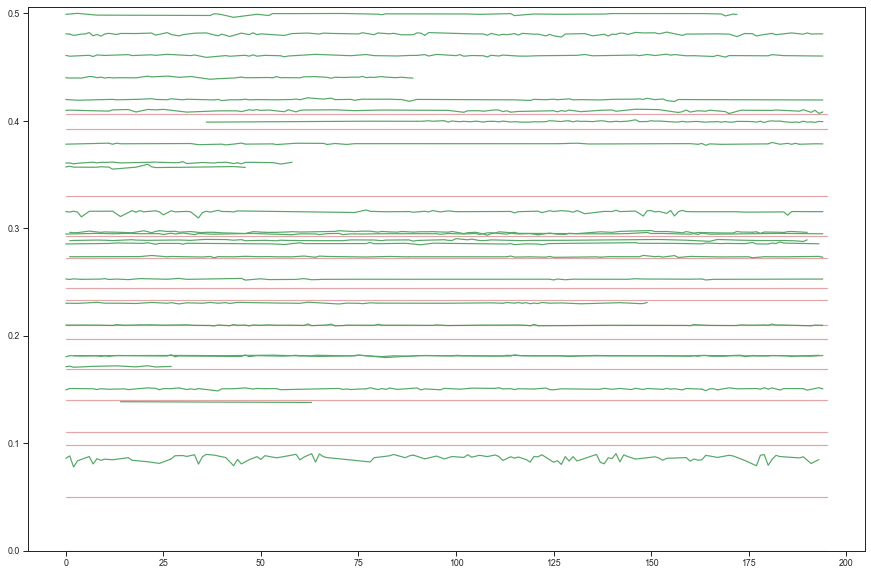

In [29]:
fig, axs = plt.subplots(figsize = (15,10))
for i in range(mode_traces.shape[0]):
    axs.plot(mode_traces[i].time_seg, mode_traces[i].frequencies,color = 'g')

for i in range(prev_discovered_modes.shape[0]):
    axs.plot([0, len(frequenciesHz)-n], [prev_discovered_modes[i],prev_discovered_modes[i]], color = 'r', alpha = 0.5)

axs.set_ylim([0,prev_discovered_modes[-1]+0.1])

#for i in range(len(frequenciesHz)-n):
    #axs.scatter(np.ones(len(frequenciesHz[i+n]))*i, frequenciesHz[i+n], color = 'orange', alpha = 0.5)